In [1]:
import keras
from keras import layers
from keras import models
from keras.datasets import mnist
from keras.utils import to_categorical

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
x_train = train_images.reshape((60000,28*28))/255
y_train = to_categorical(train_labels)

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
net = models.Sequential()
net.add(layers.Dense(512, activation='relu'))
net.add(layers.Dense(10, activation='softmax'))
net.compile(optimizer='rmsprop', loss='categorical_crossentropy')
net.fit(x_train, y_train, epochs=5, batch_size=128)
print('done')

Epoch 1/5
469/469 [==============================] - 4s 9ms/step - loss: 0.2561
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.1020
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0672
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0484
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0365
done


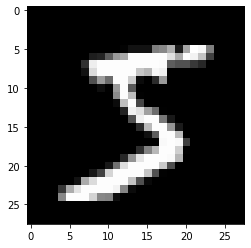

In [6]:
import matplotlib.pyplot as plt

plt.imshow(train_images[0], cmap='gray')
plt.show()

In [7]:
!pip install tensorflowjs

     |████████████████████████████████| 71kB 3.6MB/s 
     |████████████████████████████████| 112kB 7.0MB/s 
  Found existing installation: tensorflow-hub 0.10.0
    Uninstalling tensorflow-hub-0.10.0:
      Successfully uninstalled tensorflow-hub-0.10.0


In [8]:
# 참고할만한 공식문서
# https://www.tensorflow.org/js/tutorials/conversion/import_keras
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(net, './net')
print('done')

done


/usr/local/lib/python3.6/dist-packages/tensorflowjs/converters/keras_h5_conversion.py:123: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  return h5py.File(h5file)


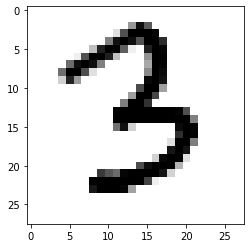

In [25]:
from PIL import Image
img = Image.open('canvas_img.png')
plt.imshow(img, cmap='gray')
plt.show()

In [41]:
import numpy as np
data = np.array(img)[:,:,3].reshape((1,-1))/255
output = net.predict(data)
print(output)
result = output.argmax(1)
print(result)

[[6.3743200e-14 1.7365532e-07 3.6099409e-06 9.9999154e-01 3.5949081e-13
  4.7728445e-06 4.7511339e-11 6.0744199e-10 4.6467559e-09 7.9383771e-13]]
[3]
